# Exploratory Data Anaysis

## Import Statements

In [230]:
# Loading custom module
import sys, os
sys.path.append(os.path.abspath('..'))
from octcv.arrViz import *          

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
import cv2

In [229]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [231]:
# Video display section
import subprocess
from IPython.display import Video, display

## Visualizing Metadata

### Loading Metadata

In [6]:
mdf = pd.read_csv('../datasrc/compositeOCT_metadata.csv')
mdf.head()

,dx_class,patient_id,laterality,image_type,set,filepath
0,glaucoma,001978,OS,volume,1,../datasrc/volumesOCT/POAG-001978-2012-02-08-O...
1,normal,002743,OS,volume,1,../datasrc/volumesOCT/Normal-002743-2009-03-26...
2,glaucoma,001086,OS,volume,1,../datasrc/volumesOCT/POAG-001086-2008-08-04-O...
3,glaucoma,000092,OS,volume,1,../datasrc/volumesOCT/POAG-000092-2010-12-14-O...
4,glaucoma,003223,OD,volume,1,../datasrc/volumesOCT/POAG-003223-2014-01-10-O...


In [7]:
# Custom function for displaying percentages in bar charts / counts plots
def displayPercentages(ax, total, yadjust=.45):
    '''
    Display the percentage of each bar in a bar chart or count plot
    '''

    nzpatches = [ p for p in ax.patches if p.get_height() > 0 ]

    total = sum(p.get_height() for p in nzpatches)

    for p in nzpatches:
        count = p.get_height()
        percent = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() * yadjust
        ax.annotate(f'{percent:.2f}%', (x, y), ha='center', va='bottom', fontsize=10)


### Diagnostic Class Distributions 

Text(0, 0.5, 'Count')

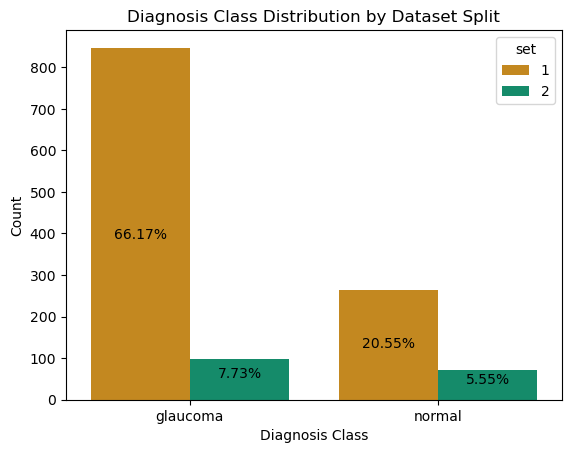

In [8]:
palette = sns.color_palette("colorblind")


# Class Distrubutions
ax = sns.countplot(data=mdf, x='dx_class', hue='set', palette=palette[1:])
total = len(mdf)
displayPercentages(ax, total)
plt.title("Diagnosis Class Distribution by Dataset Split")
plt.xlabel("Diagnosis Class")
plt.ylabel("Count")

### Laterality Distributions

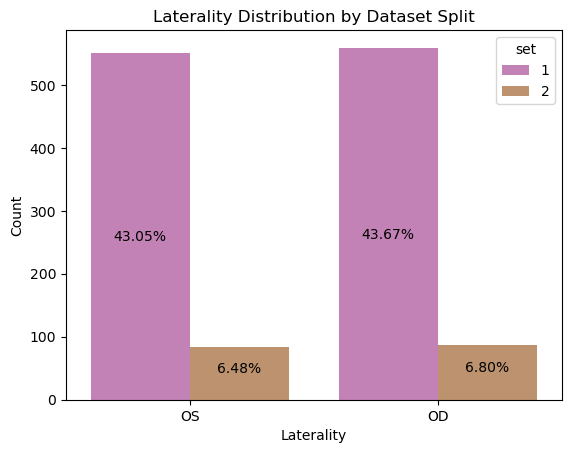

In [9]:
ax = sns.countplot(data=mdf, x='laterality', hue='set', palette=palette[4:])
total = len(mdf)
displayPercentages(ax, total)
plt.title("Laterality Distribution by Dataset Split")
plt.xlabel("Laterality")
plt.ylabel("Count")
plt.show()

### Image Type Distributions

Text(0, 0.5, 'Count')

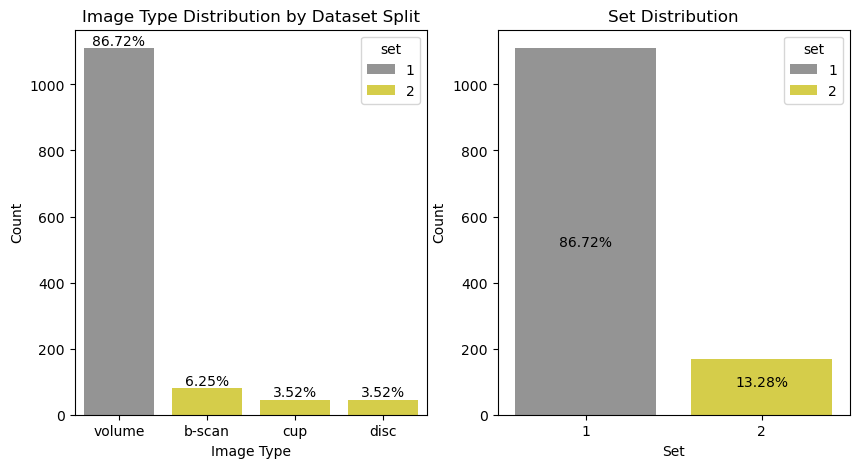

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=mdf, x='image_type', hue='set', palette=palette[7:], ax=ax.flat[0])
displayPercentages(ax.flat[0], total, yadjust=1)
ax.flat[0].set_title("Image Type Distribution by Dataset Split")
ax.flat[0].set_xlabel("Image Type")
ax.flat[0].set_ylabel("Count")

sns.countplot(data=mdf, x='set', hue='set', palette=palette[7:], ax=ax.flat[1])
displayPercentages(ax.flat[1], total)
ax.flat[1].set_title("Set Distribution")
ax.flat[1].set_xlabel("Set")
ax.flat[1].set_ylabel("Count")

## Volume & Image Characteristics 

### Plotting Volumes & Images

**NOTE:** many cells in this section use `arrViz`, a custom module written for this project located at `OCTCV/octcv/arrViz.py` -- see source code or use `help()` for more information.

In [11]:
# Separate into the original sets

# Volumes
vdf = mdf[mdf.set == 1]

# 2D Images
idf = mdf[mdf.set == 2]

# Further subset the actual B-scan images
bdf = idf[idf.image_type=='b-scan']


vdf.shape, idf.shape, bdf.shape

((1110, 6), (170, 6), (80, 6))

In [12]:
# Reformat patient_id of images to be numerical for easier sorting
idf['patient_id'] = idf.patient_id.str.extract(r'(\d+)', expand=False).astype(int)
idf.sort_values(by=['patient_id','laterality','dx_class','image_type'], inplace=True)
idf.head()

# idf.set_index(['patient_id','laterality','dx_class','image_type'], inplace=False)


,dx_class,patient_id,laterality,image_type,set,filepath
1230,normal,1,OD,b-scan,2,../datasrc/fundus-oct-composite/Healthy/P_1/Ri...
1231,normal,1,OD,cup,2,../datasrc/fundus-oct-composite/Healthy/P_1/Ri...
1229,normal,1,OD,disc,2,../datasrc/fundus-oct-composite/Healthy/P_1/Ri...
1126,glaucoma,1,OS,b-scan,2,../datasrc/fundus-oct-composite/Glaucoma/P_1/L...
1128,glaucoma,1,OS,cup,2,../datasrc/fundus-oct-composite/Glaucoma/P_1/L...


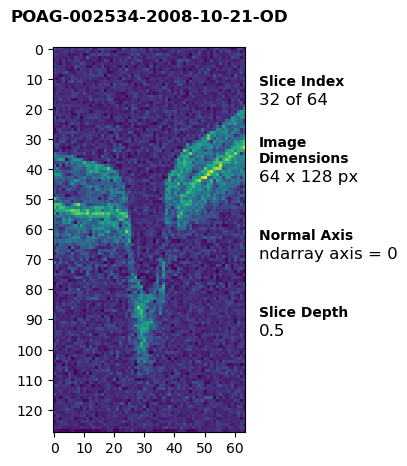

In [14]:
# Viewing the middle slice of a 3D volume using custom octcv.arrViz.viewCrossSection() method
viewCrossSection(vdf.filepath.iloc[5], axis_norm=0)

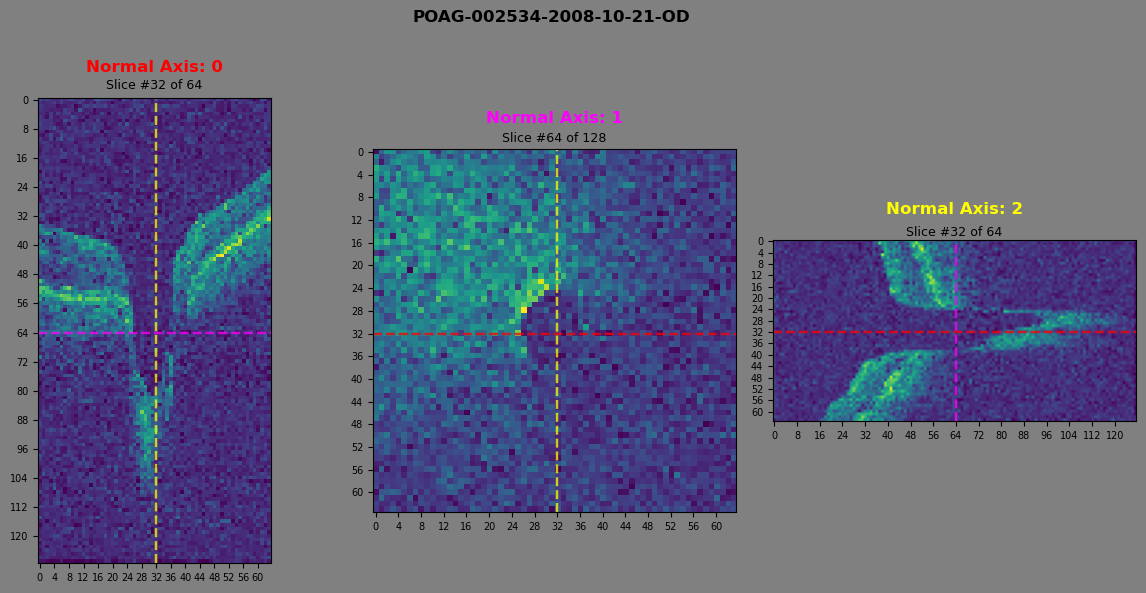

In [15]:
# Viewing all three orthogonal slices of the 3D volume using custom octcv.arrViz.orthoPlanes() method
fig,ax = orthoPlanes(vdf.filepath.iloc[5],ortho_depth=(.5,.5,.5),axlines=True,figsize=(12,6))

NOTE: the Normal Axis # titles indicate which ndarray axis is normal to the slice being displayed.  For a given slice displayed, the line through which the other slices intersect it are plotted in the same color as the their respective Normal Axis # title - e.g., the horizontal red line in the middle image represents the where the left image intersects with it, while the vertical yellow line is where the right image intersects. 

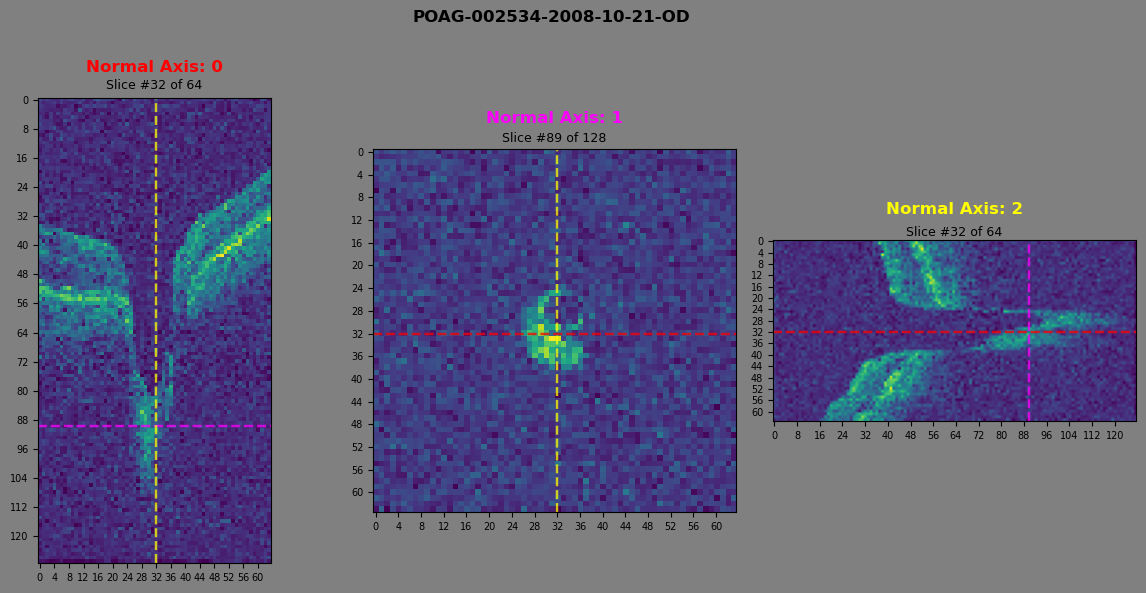

In [16]:
# Adjusting slice depth along normal axis 0 (red) down to 25% of the total length along that axis (i.e., to slice index 64 * 0.25 = 16)
_,_ = orthoPlanes(vdf.filepath.iloc[5],ortho_depth=(.5,.7,.5),axlines=True,figsize=(12,6))

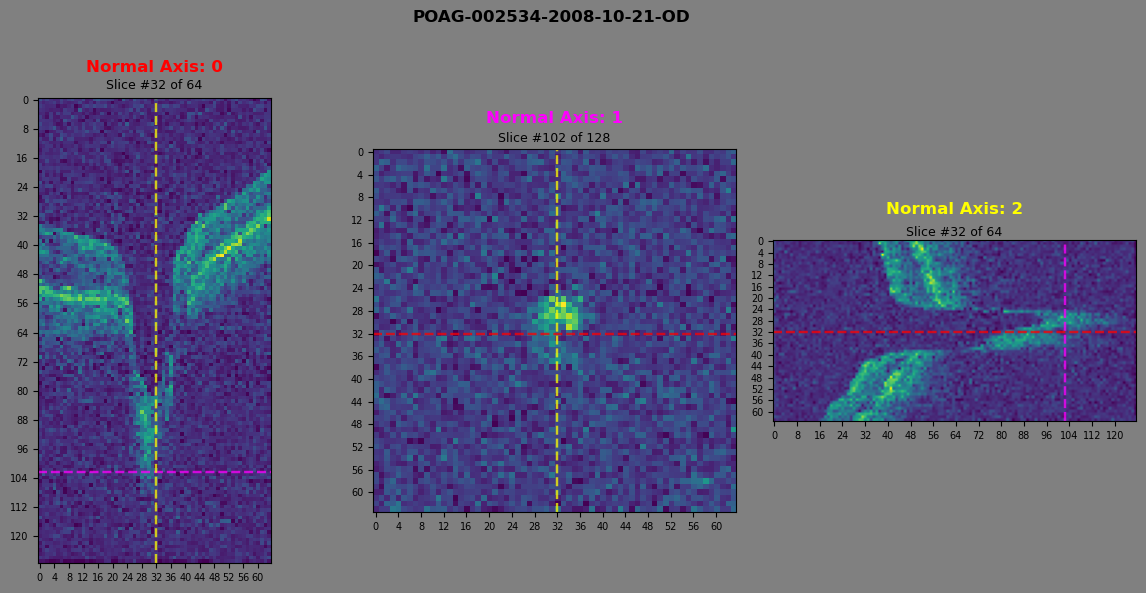

In [17]:
# Adjusting slice along normal axis 1 (magenta) up to 80% (or down to y=102 in terms of pixel coordinate axes orientation) of the total length along that axis
_,_ = orthoPlanes(vdf.filepath.iloc[5],ortho_depth=(.5,.8,.5),axlines=True,figsize=(12,6))

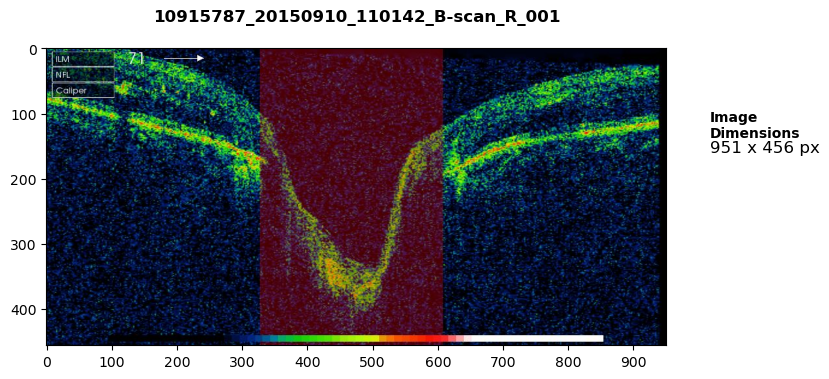

In [18]:
# Viewing a 2D image
viewCrossSection(bdf.filepath.iloc[5], figsize=(8,6))

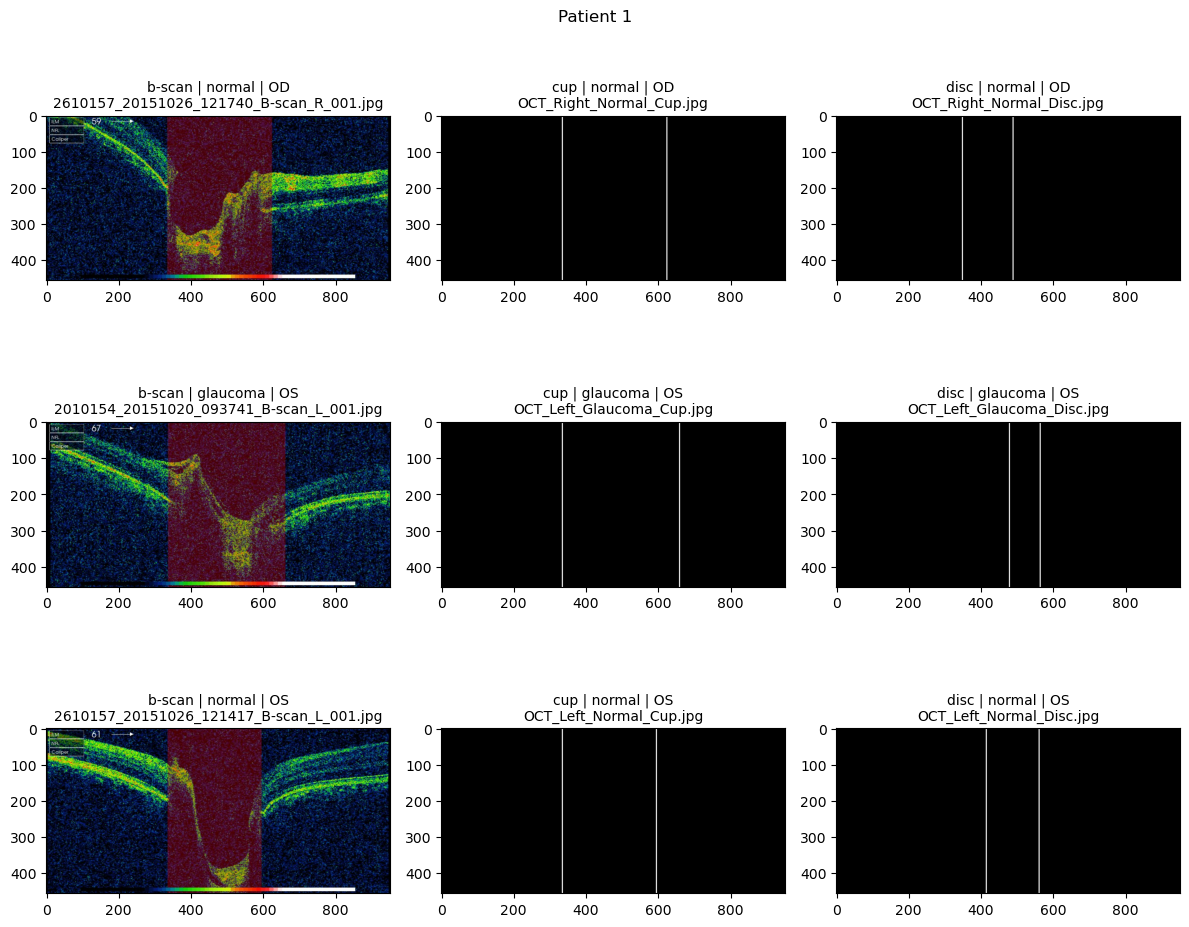

In [19]:
viewImagesByPatient(idf,1,figsize=(12,10))

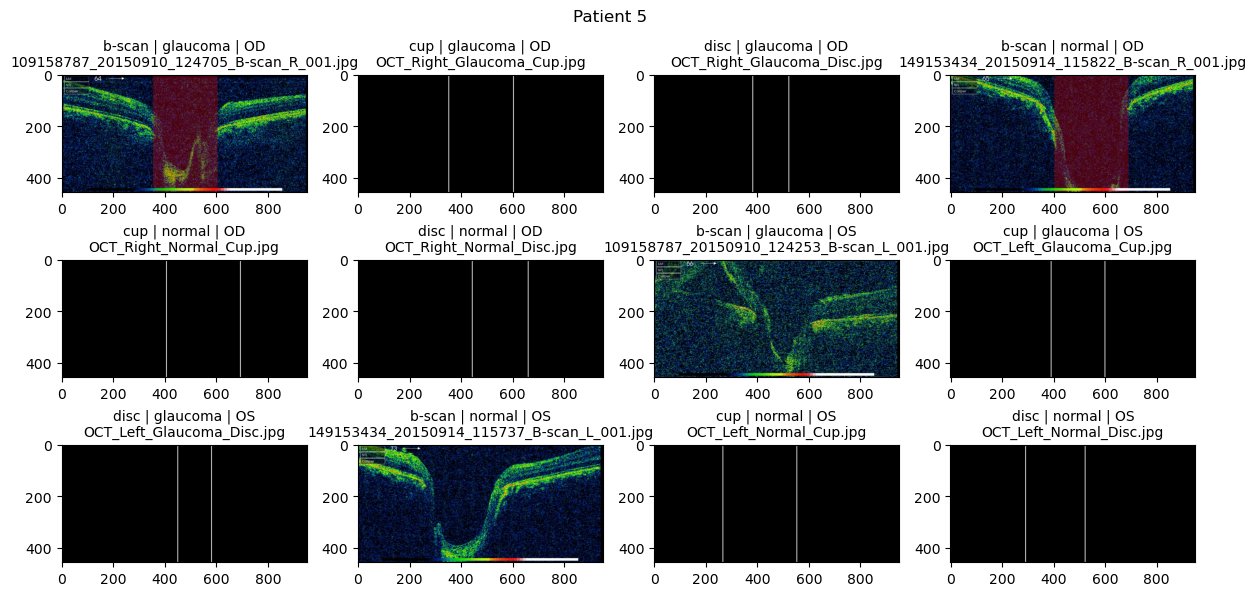

In [20]:
viewImagesByPatient(idf,5, figsize=(12,6))

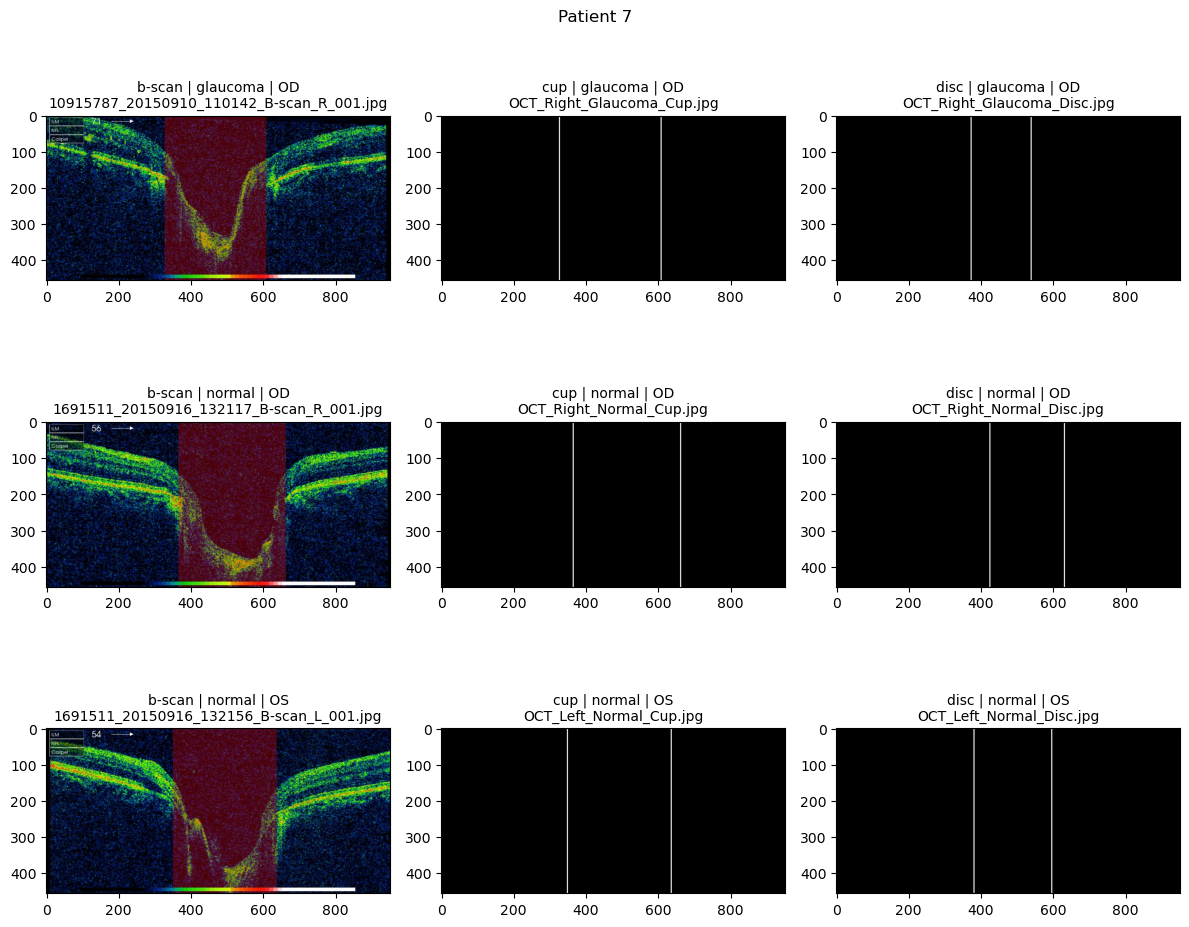

In [21]:
viewImagesByPatient(idf,7, figsize=(12,10))

### Displaying Videos 

As noted during Data Wrangling (`../p2_Data_Wrangling/dataWrangling.ipynb`), there are two files for patient #12 in the `fundus-oct-composite` set (SET2) that are NOT images, but instead are **videos** (`.wmv`):

In [23]:
vidFilePaths = [
    '../datasrc/fundus-oct-composite/Healthy/P_12/Left_Eye/2d_lt.wmv',
    '../datasrc/fundus-oct-composite/Healthy/P_12/Right_Eye/2d_rt.wmv'
]

f0, d0 = ('../datasrc/fundus-oct-composite/Healthy/P_12/Left_Eye/mpeg4_files/2d_lt_temp.mp4',
 '../datasrc/fundus-oct-composite/Healthy/P_12/Left_Eye/mpeg4_files')

f1, d1 = ('../datasrc/fundus-oct-composite/Healthy/P_12/Right_Eye/mpeg4_files/2d_rt_temp.mp4',
 '../datasrc/fundus-oct-composite/Healthy/P_12/Right_Eye/mpeg4_files')

os.path.isfile(f0) , os.path.isdir(d0), os.path.isfile(f1) , os.path.isdir(d1)

(False, False, False, False)

In [44]:
# Function to display the WMV files (converts to mpeg4 to be viewed within Jupyter/IPython env).
def displayWMV(wmvPath):
    filename = os.path.basename(wmvPath)
    oDIR = os.path.join(os.path.dirname(wmvPath),'mpeg4_files')
    if not os.path.isdir(oDIR):
        os.makedirs(oDIR)
    #Convert wmv files to mp4 to be viewed in jupyter
    oPATH = os.path.join(oDIR,f'{filename.split(".")[0]}_temp.mp4')
    subprocess.run(["ffmpeg","-loglevel","error", "-i", wmvPath, oPATH, "-y"])

    video = Video(oPATH)
    display(video)
    
    return oPATH,oDIR

In [232]:
tmpP0,tmpD0 = displayWMV(vidFilePaths[0])

In [233]:
tmpP1,tmpD1 = displayWMV(vidFilePaths[1])

While this suggests the possibility reconstructing a volume from the frames (particularly since they go from index 0 to 127, therefore contributing to a width of 128px in that dimension, and can be downsampled to 64px in that dimension to match that of the volumes in the other set), there are only two videos in the entire set, it seems, and would contribute two healthy volumes for a single patient (OS/OD).  Unlikely to be of much use here, but can get back to it later if desired (e.g. during pre-processing or depending on what results during modeling).

In [50]:
# Remove temporary mpeg4 paths
def cleanup():
    for i in [tmpP0,tmpP1,tmpD0,tmpD1]:
        if os.path.isfile(i):
            os.remove(i)
        elif os.path.isdir(i):
            os.rmdir(i)

In [51]:
# cleanup()
# os.path.isfile(tmpP0) , os.path.isdir(tmpD0), os.path.isfile(tmpP1) , os.path.isdir(tmpD1)

### Distributions of Image Dimensions

#### Getting dimensions of each file

Given the exploration seen regarding image axese above, the following association is established:

`axis=1` for the 3D volumes is equivalent to `axis=0` for the 2D images.


Otherwise, the volume-equivalent of the 2D image's X axis `axis=1`/width either `axis=0` or `axis=2` of the volumes.  Since we think the slices normal to axis 0 of the volumes is most likely equivalent to the 2d images, then other axis within the plane of the slice would be the 2d image axes equivalents -- this would imply that axis 0 of the volumes is the "depth"/'Z' axis that the 2d images don't have, making axis 2 of the volumes equivalent to axis 1 or the images.

```plaintext
i[0] --- v[1]
i[1] --- v[2]
i[2] is either color channel or doesn't exist, while v[0] is the "depth'/Z dimension

Thus, while
```
```python
height, width, color = image.shape
```

for volumes it's:

```python
depth, height, width = volume.shape
```



In [54]:
# Get the dimensions of each file in the main dataframe (mdf)
rows = []
for filepath in mdf.filepath:  
    arr = pathToArray(filepath)
    dimClass = arrayDimParser(arr)
    if dimClass.lower().startswith('2d'):
        if len(arr.shape) == 2:
            h,w = arr.shape
        elif len(arr.shape) == 3:
            h,w,_ = arr.shape
    elif dimClass.lower().startswith('3d gray'):
        d,h,w = arr.shape
            
    rows.append({"filepath": filepath, "kind": dimClass, "Y": h, "X": w, "Z": d})

df = pd.DataFrame(rows)

df.head()


,filepath,kind,Y,X,Z
0,../datasrc/volumesOCT/POAG-001978-2012-02-08-O...,3D grayscale,128,64,64
1,../datasrc/volumesOCT/Normal-002743-2009-03-26...,3D grayscale,128,64,64
2,../datasrc/volumesOCT/POAG-001086-2008-08-04-O...,3D grayscale,128,64,64
3,../datasrc/volumesOCT/POAG-000092-2010-12-14-O...,3D grayscale,128,64,64
4,../datasrc/volumesOCT/POAG-003223-2014-01-10-O...,3D grayscale,128,64,64


#### Plotting histograms for each dimension


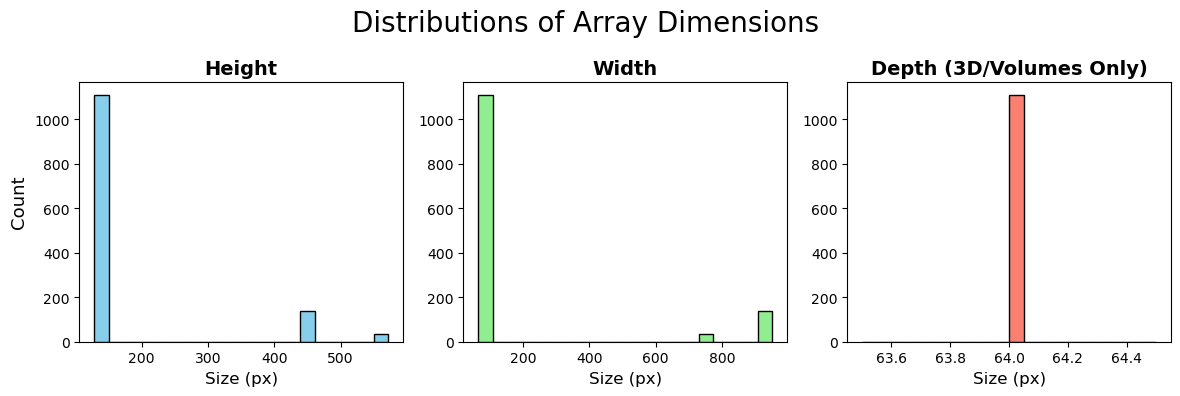

In [68]:
# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Plot height (Y) histogram
ax[0].hist(df["Y"], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title("Height", fontweight='bold',fontsize=14)
ax[0].set_xlabel('Size (px)',fontsize=12)
ax[0].set

# Plot width (X) histogram
ax[1].hist(df["X"], bins=20, color='lightgreen', edgecolor='black')
ax[1].set_title("Width", fontweight='bold',fontsize=14)
ax[1].set_xlabel('Size (px)',fontsize=12)

# Plot depth (Z) histogram - should be empty for 2D images
ax[2].hist(df.loc[df["kind"].str.startswith("3D"), "Z"], bins=20, color='salmon', edgecolor='black')
ax[2].set_title('Depth (3D/Volumes Only)',fontweight='bold',fontsize=14)
ax[2].set_xlabel('Size (px)',fontsize=12)

# Figure formatting
fig.supylabel('Count',fontsize=13)
fig.suptitle('Distributions of Array Dimensions',fontsize=20)
plt.tight_layout()
plt.show()

#### Scatterplot of heights & widths

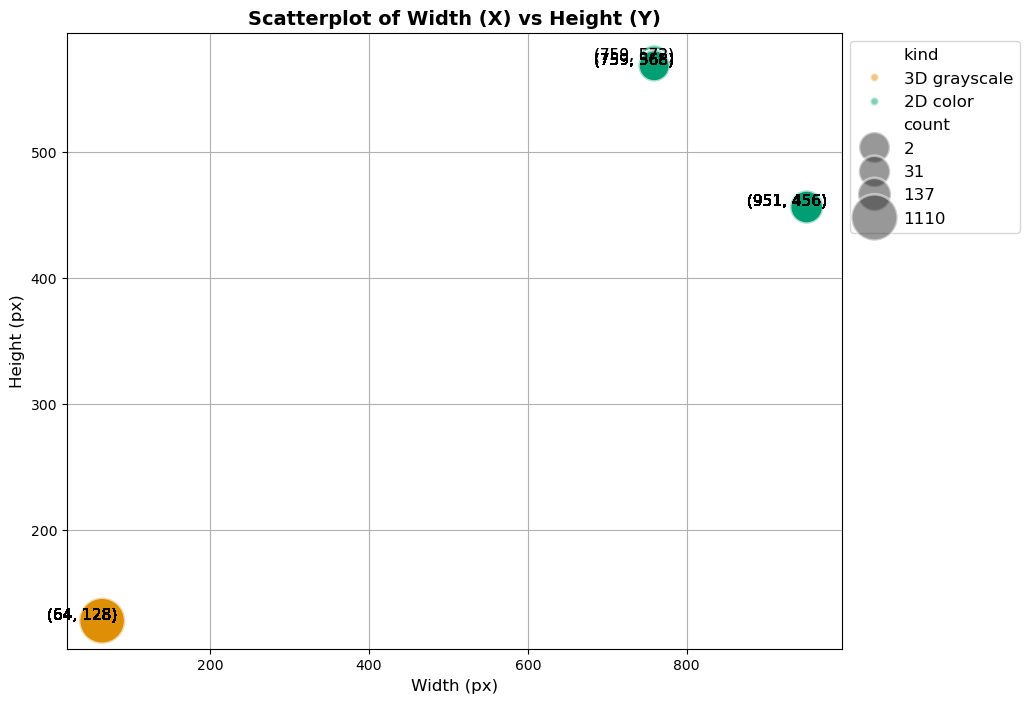

In [215]:
# Scatterplot of height (Y) vs width (X)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

df['count'] = df.groupby(['Y', 'X'])['Y'].transform('count')
max_count = df['count'].max()

sns.scatterplot(x="X", y="Y", 
                data=df, 
                hue="kind", 
                palette=sns.color_palette("colorblind")[1:],
                alpha=0.5, 
                # edgecolor='dimgray', 
                sizes=(500, max_count), 
                size='count')

for _,row in df.iterrows():
    ax.text(
        row['X']-25,
        row['Y']+5,
        f"({row['X']}, {row['Y']})",
        ha='center',
        va='center',
        fontsize=11
    )

ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

ax.set_xlabel('Width (px)',fontsize=12)
ax.set_ylabel('Height (px)',fontsize=12)

ax.set_title('Scatterplot of Width (X) vs Height (Y)',
             fontweight='bold',
             fontsize=14)

ax.grid(True)

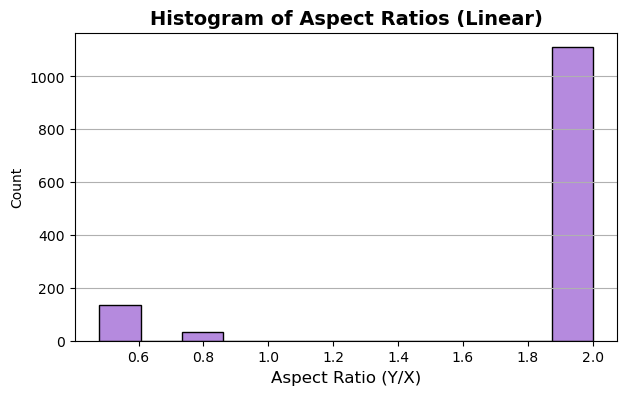

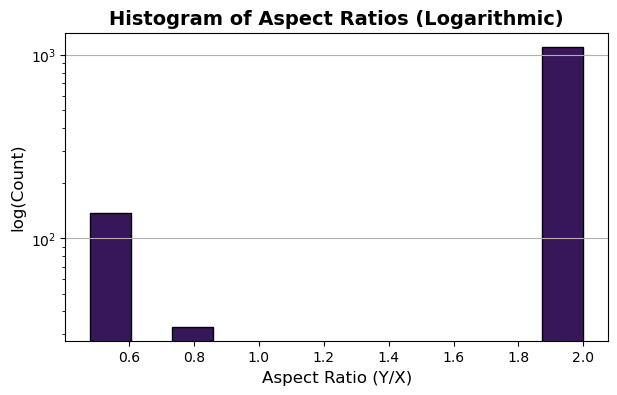

In [216]:
# Histogram of aspect ratios

# Linear scale
fig = plt.figure(figsize=(7, 4))
sns.histplot(df["Y"] / df["X"], bins=12, color="#9c63d4", edgecolor='black')
# horizontal gridlines
plt.grid(True, axis='y')
plt.xlabel('Aspect Ratio (Y/X)',fontsize=12)
plt.title('Histogram of Aspect Ratios (Linear)',fontweight='bold',fontsize=14)

# Logarithmic scale
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df["Y"] / df["X"], bins=12, color="#38165a", edgecolor='black')
ax.set_yscale('log')
ax.set_xlabel('Aspect Ratio (Y/X)',fontsize=12)
ax.set_ylabel('log(Count)',fontsize=12)
ax.set_title('Histogram of Aspect Ratios (Logarithmic)',fontweight='bold',fontsize=14)
ax.grid(True, axis='y')

While the volumes are all identical in dimension, the images notably diverge in both overall size and aspect ratio, which is expected based on what the images actually looked like earlier.  These visualizations may be revisited after pre-processing (i.e., cropping and rescaling should result in image dimensions of 64x128 as with the all the volumes slices normal to the Z axis).

### Pixel Intensity Distributions 

In [217]:
mdf['color_dims'] = mdf.filepath.apply(lambda x : arrayDimParser(pathToArray(x)))
mdf.head(3)

,dx_class,patient_id,laterality,image_type,set,filepath,color_dims
0,glaucoma,001978,OS,volume,1,../datasrc/volumesOCT/POAG-001978-2012-02-08-O...,3D grayscale
1,normal,002743,OS,volume,1,../datasrc/volumesOCT/Normal-002743-2009-03-26...,3D grayscale
2,glaucoma,001086,OS,volume,1,../datasrc/volumesOCT/POAG-001086-2008-08-04-O...,3D grayscale


In [218]:
mdf.color_dims.unique()

array(['3D grayscale', '2D color'], dtype=object)

Since all of the 2D images have color channels, will need to calculate the pixel intensities from their R,G, B values in order to accurately plot a pixel intensity histogram.  Since the scans are ultimately grayscale in nature, this will be a good "normalization" step to get more similarity with the volume slices.

Per the [openCV documentation](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html), the following weighted average is used to convert a color image to grayscale:
$$
\textbf{I} = 0.299R + 0.587G + 0.114B
$$

We can just convert the images to grayscale, and the pixel values will them represent this intensity.

NOTE: The custom function `vizInputParser` automatically converts BGR images to RGB for convenient viewing in `matplotlib`, so in this step conversion will be from RGB to grayscale despite the default `cv2` color format being BGR.

In [220]:
def pixelIntensityHistogram(filepath,ax=None):

    # convert vizInput to NumPy array
    arr = vizInputParser(filepath)
    colordim=arrayDimParser(arr)
    if colordim.lower().endswith('color'):
        arr = cv2.cvtColor(arr,cv2.COLOR_RGB2GRAY)

    # flatten array into vector of pixel intensities
    pix_intensities = arr.flatten()
    filename = os.path.basename(filepath)
    
    # prepare binning and other parameters for plotting
    nbins = np.sqrt(len(pix_intensities)).round().astype(int) // 2
    counts, bin_edges = np.histogram(pix_intensities, bins=nbins)
    ymax = np.max(counts)
    xmax = pix_intensities.max()
    
    annotation_text = f"Color Dimension\nClass of Original:\n {colordim}"
    annotation_position = (0.75*xmax,.75*ymax)
    

    # plot histogram
    if ax:
        # plt.title("Pixel Intensity Histogram")
        sns.histplot(pix_intensities, bins=nbins, ax=ax)
        ax.set_title(f"{filename}")
        plt.suptitle("Pixel Intensity Histograms",fontsize=15)
        ax.set_xlabel("Pixel Intensity")
        ax.set_ylabel("Count")
        ax.annotate(annotation_text,xy=annotation_position) 
        
    else:
        sns.histplot(pix_intensities,bins=nbins)
        plt.title(f"{filename}")
        plt.suptitle("Pixel Intensity Histogram", fontsize=15)
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Count")
        plt.annotate(annotation_text,xy=annotation_position) 
    plt.tight_layout()

File Index: 860


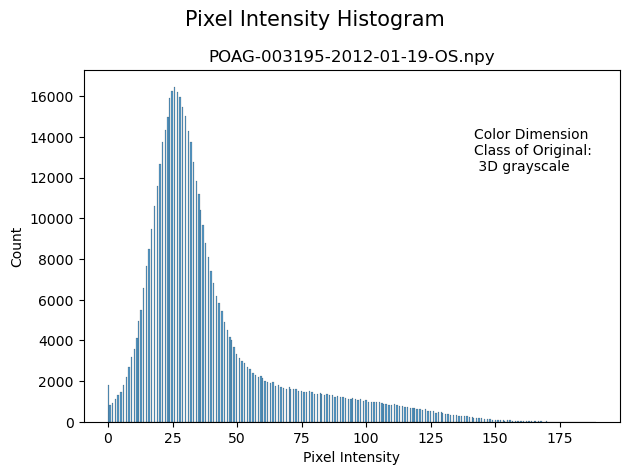

In [221]:
# View pixel intensities for a random volume in the set
np.random.seed(42)
irand = np.random.choice(range(len(vdf)))
print(f"File Index: {irand}")
pixelIntensityHistogram(vdf.filepath.iloc[irand])    
    

File Index: 14


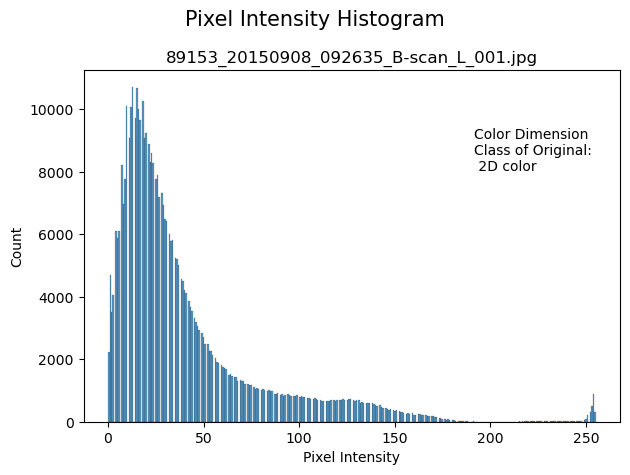

In [222]:
# View pixel intensities for a random 2D b-scan image in the set
bdf = idf[idf.image_type=='b-scan']

irand = np.random.choice(range(len(bdf)))
print(f"File Index: {irand}")
pixelIntensityHistogram(bdf.filepath.iloc[irand])  

Looks like the 2D images might perhaps be slight right skewed compared to the Volumes, but the peaks are fairly similar at ~25.  Additionally, there seems to be a small second peak in the upper end of pixel intensity for the 2D images, likely corresponding to whitespace / graphical labeling that will cropped out during pre-processing.  Again, it may be useful to compare these histograms again during pre-processing after cropping images, downscaling, and other transformations (e.g.,normalization of pixel intensities).

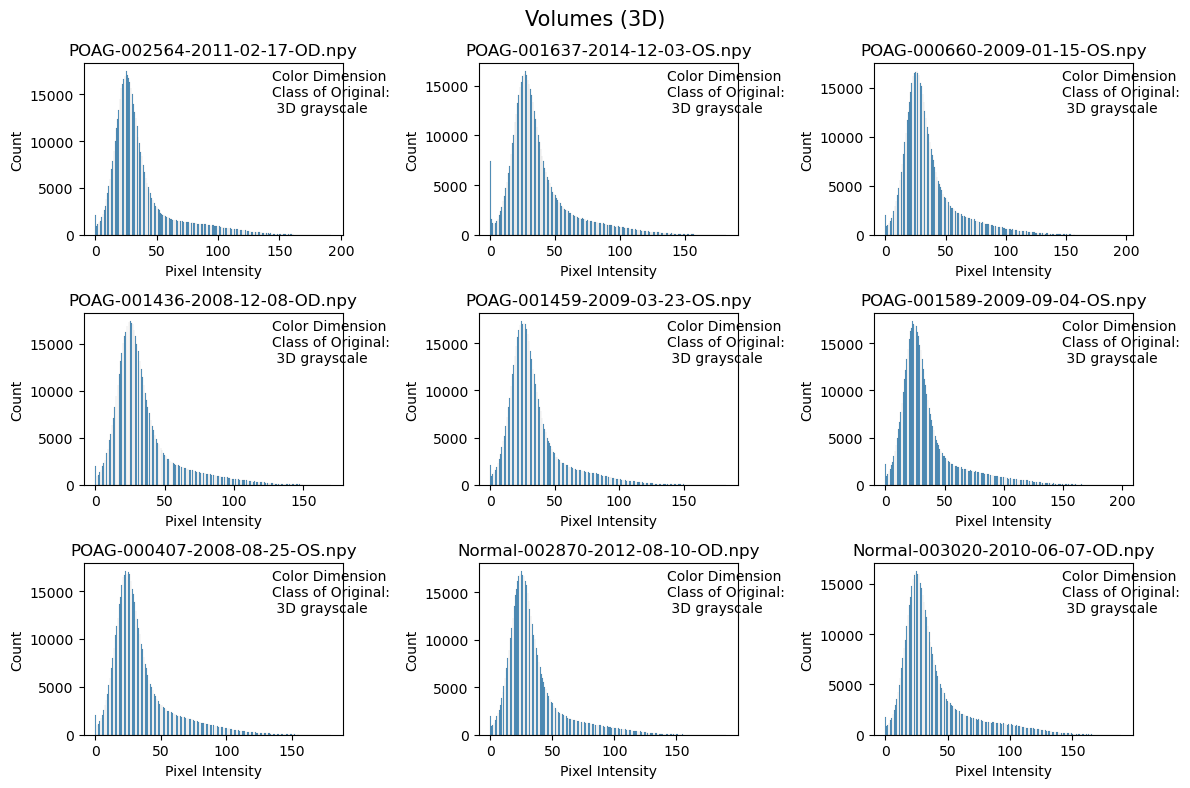

In [223]:
# View set of 9 histograms for 3D Volumes
fig, ax = plt.subplots(3,3,figsize=(12,8))

for i, filepath in enumerate(vdf.filepath.iloc[400:409]):
    pixelIntensityHistogram(filepath,ax=ax.flat[i])

fig.suptitle("Volumes (3D)",fontsize=15)
plt.tight_layout()

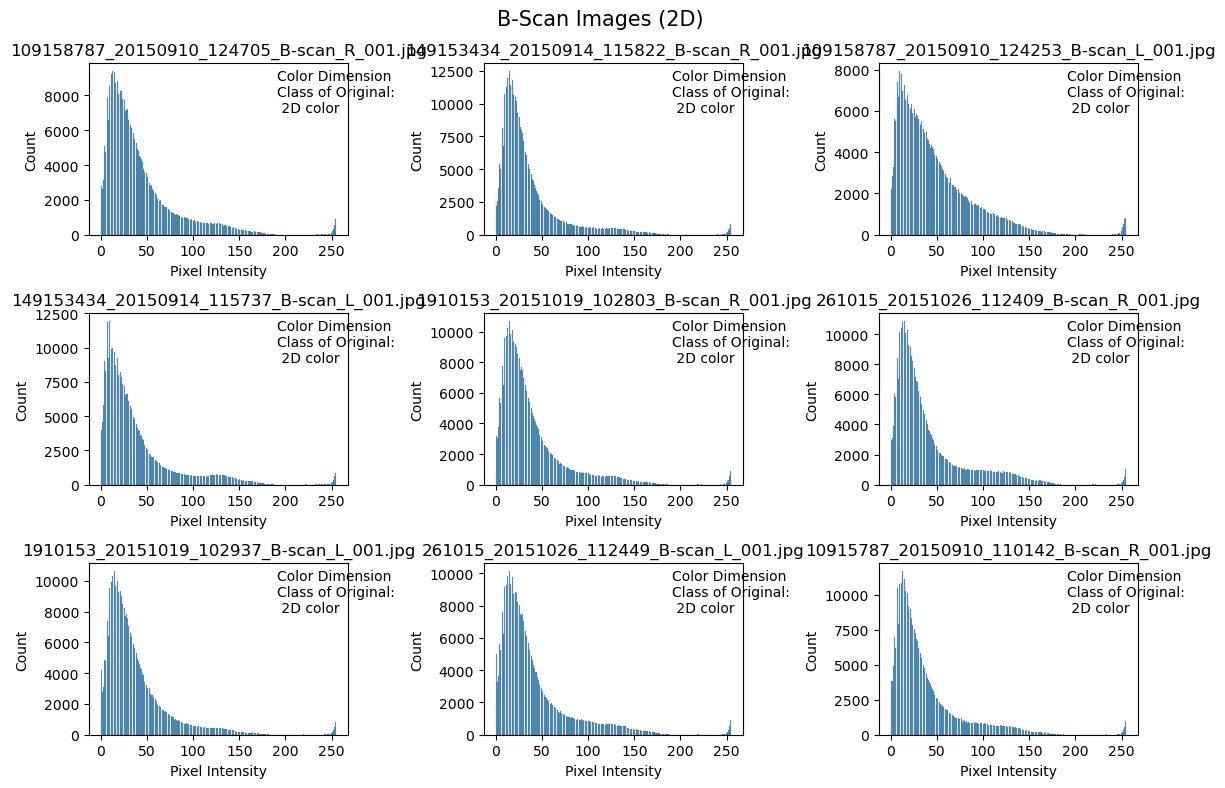

In [224]:
# View set of 9 histograms for B-scan 2D Images
fig,ax = plt.subplots(3,3,figsize=(12,8))

for i, filepath in enumerate(list(idf[idf['image_type']=='b-scan'].filepath)[15:24]):
    pixelIntensityHistogram(filepath,ax=ax.flat[i])

fig.suptitle('B-Scan Images (2D)',fontsize=15)
plt.tight_layout()

And it seems like the general distribution shapes are fairly consistent throughout all images within their respective sets (i.e., all 2D B-scan images have very similar pixel intensity distributions to each other, and all 3D volumes have very similar pixel intesnsity distributions to each other.)

## Summary

In this notebook, we:

1. Imported metadata table (`compositeOCT_metadata.csv`)
2. Visualized metadata features:
   + Class Labels
   + Laterality
   + Image Types

3. Visualized Volume/Image Characteristics
   + Appearance (plotting volume slices / images)
     + Briefly viewed video files as well - likely will not use these.
   + Distributions of Dimensions (H,W,D)
   + Distributions of Pixel Intensities

Some significant differences are noted between SET 1 and SET 2 that are hoped to be resolved during pre-processing.